In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#print('hello outliers')
df= pd.read_csv('ventas_totales_sinnulos.csv', index_col=0)
#print(df.head())

valores_nulos=df.isnull().sum()
print(valores_nulos)

indice_tiempo                          0
ventas_precios_corrientes              0
ventas_precios_constantes              0
ventas_totales_canal_venta             0
salon_ventas                           0
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        0
tarjetas_credito                       0
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                0
almacen                                0
panaderia                              0
lacteos                                0
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         0
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    0
electronicos_articulos_hogar           0
otros                                  0
dtype: int64


In [86]:
df.head(5)

,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,01/01/2017,27858.9,27477.3,27858872.08,27591730.13,267141.956,27858872.08,1.023010e+07,6864575.384,9047205.493,...,6705475.318,9.459063e+05,2880656.169,2606192.942,1.050314e+06,340777.3882,4397543.671,772371.8476,1838507.096,2806660.309
1,01/02/2017,25994.2,25223.4,25994200.17,25749179.40,245020.769,25994200.17,9.719067e+06,6438494.011,8309150.301,...,6576624.803,9.256186e+05,2855639.900,2600083.591,1.026167e+06,328288.6951,4053283.771,672290.5165,1257661.903,2354084.901
2,01/03/2017,27780.0,26334.3,27780006.52,27472228.72,307777.804,27780006.52,1.024444e+07,6908522.962,8845010.494,...,7437264.174,1.016148e+06,3188259.169,2824976.726,1.075526e+06,353335.1548,4354197.611,667696.6653,1305674.917,2266189.277
3,01/04/2017,29134.3,27045.9,29134272.22,28827479.49,306792.733,29134272.22,1.031263e+07,7454251.800,9458166.682,...,8211244.093,1.132396e+06,3257140.159,3006158.760,1.037213e+06,359694.4537,4355706.646,838948.2458,1535726.345,2146755.887
4,01/05/2017,27969.0,25631.9,27969004.68,27569311.41,399693.262,27969004.68,1.014761e+07,6735747.319,9220929.862,...,7651058.084,1.033082e+06,3232635.767,2799142.123,9.826512e+05,336568.0085,4206101.605,915895.1498,1824462.036,2117971.483


##Voy a revisar outliers en las columnas de indumentario calzado, electronicos, y panaderia

<Figure size 500x300 with 0 Axes>

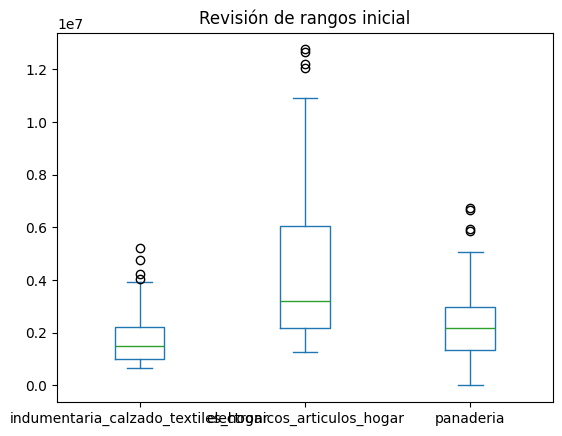

In [87]:
fig = plt.figure(figsize =(5, 3))
ax = df[['indumentaria_calzado_textiles_hogar', 'electronicos_articulos_hogar', 'panaderia']].plot(kind='box', title='Revisión de rangos inicial')
plt.show()

Ya que tienen outliers, voy a tratarlos con el rango intercuartílico

In [88]:
y = df['indumentaria_calzado_textiles_hogar']

In [89]:
def tratamientopercentiles(y):
    inf_lim = y.mean() - 2*y.std()
    sup_lim = y.mean() + 2*y.std()
    print("Limite superior permitido", sup_lim)
    print("Limite inferior permitido", inf_lim)
    return inf_lim, sup_lim

Limite superior permitido 3994284.036525745
Limite inferior permitido -329139.82847651467


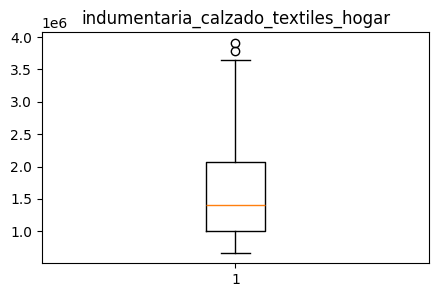

In [90]:
#Obtenemos datos limpios

inf_lim, sup_lim = tratamientopercentiles(y)
data_clean= df.indumentaria_calzado_textiles_hogar[ (y <= sup_lim) & (y >= inf_lim) ]
df['indumentaria_calzado_textiles_hogar'] = data_clean

fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean) 
plt.title("indumentaria_calzado_textiles_hogar")
plt.show()

df['indumentaria_calzado_textiles_hogar'].to_csv('Calzado.csv')

Limite superior permitido 11008332.773361584
Limite inferior permitido -1844931.5440692771


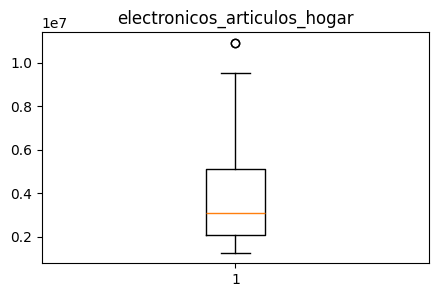

In [94]:
y = df['electronicos_articulos_hogar']

#Obtenemos datos limpios

inf_lim, sup_lim = tratamientopercentiles(y)
data_clean= df.electronicos_articulos_hogar[ (y <= sup_lim) & (y >= inf_lim) ]
df['electronicos_articulos_hogar'] = data_clean

fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean) 
plt.title("electronicos_articulos_hogar")
plt.show()

df['electronicos_articulos_hogar'].to_csv('Electronicos.csv')

Limite superior permitido 5481306.318709277
Limite inferior permitido -473079.46435543103


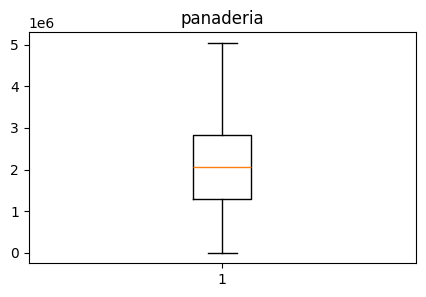

In [93]:
y = df['panaderia']

#Obtenemos datos limpios

inf_lim, sup_lim = tratamientopercentiles(y)
data_clean= df.panaderia[ (y <= sup_lim) & (y >= inf_lim) ]
df['panaderia'] = data_clean

fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean) 
plt.title("panaderia")
plt.show()

df['panaderia'].to_csv('Panaderia.csv')